# UFO dataset -> making a dashboard

In [2]:
# usual things
import pandas as pd
import bqplot
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ufos = pd.read_csv("/Users/jillnaiman/Downloads/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", 
                           "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [4]:
len(ufos)

80332

In [5]:
# downsampling if you want to:
nsamples = 1000 # 100, 5000
downSampleMask = np.random.choice(range(len(ufos)-1), nsamples, replace=False)

In [7]:
#downSampleMask
ufosDS = ufos.loc[downSampleMask]

In [8]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
11213,2011-01-01 00:00:00,farmington hills,mi,us,circle,900.0,appx. 15 mins,Series of red lights moving in a wave-like line.,2011-01-05,42.485278,-83.377222
28294,2013-02-23 18:57:00,whittier,ca,us,circle,300.0,3-5 minutes,13 to 15 bright reddish/orange orb shaped obje...,2013-02-28,33.979167,-118.031944
25409,2006-01-09 18:53:00,el segundo,ca,us,fireball,10.0,10 sec,Rotating fire ball moving very fast&#44 few hu...,2006-02-14,33.919167,-118.415556
20276,2010-12-24 20:00:00,cherry fork,oh,us,light,300.0,5 min,Three red lights in triangle formation no soun...,2011-04-03,38.887500,-83.614444
7783,2010-11-10 21:00:00,spruce pine,nc,us,triangle,3600.0,1 hour,Red and Yellow Prisms in the Sky over Appalachia,2012-05-13,35.915278,-82.064722
...,...,...,...,...,...,...,...,...,...,...,...
11400,2014-01-01 00:00:00,kettering,oh,us,circle,45.0,45 seconds,Strange orange ball.,2014-01-10,39.689444,-84.168889
16889,1998-12-10 01:15:00,camp pendelton,ca,NaN,sphere,109800.0,3 1/2 hrs,Blue Sphere,2005-05-24,33.317842,-117.320512
68557,2002-08-02 22:30:00,camarillo,ca,us,other,15.0,15 seconds,Unbelievable craft observed at low altitude ov...,2013-04-12,34.216389,-119.036667
52232,2000-06-28 01:00:00,newmarket,nh,us,oval,300.0,aprox.5min.,Black oval w/ multi-colored lights a frighteni...,2000-08-25,43.082778,-70.935556


In [9]:
# quick scatter plot:

# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# set up axis
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, label='Latitude', 
                  orientation='vertical')

# marks
scatters = bqplot.Scatter(x = ufosDS['longitude'], y=ufosDS['latitude'],
                         scales={'x':x_sc, 'y':y_sc})

# interaction
# none for this one

# put all together in a figure
fig = bqplot.Figure(marks=[scatters], axes=[x_ax, y_ax])
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

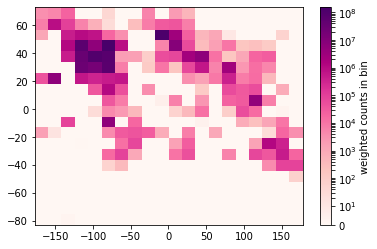

In [13]:
# use ~~numpy~~ matplotlib to make some 2d histograms
import matplotlib.colors as mpl_colors
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
          bins=20, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('weighted counts in bin')

So, using matplotlib to make a quick plot, we have an idea of how our final heatmap should look.

In [14]:
# for bqplot heatmap, make the histograms ourselves
nlong = 20
nlat = 20

hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                              ufos['latitude'], 
                                              weights = ufos['duration_seconds'], 
                                              bins=[nlong, nlat])

In [16]:
hist2d.max(), hist2d.min()

(153348519.88, 0.0)

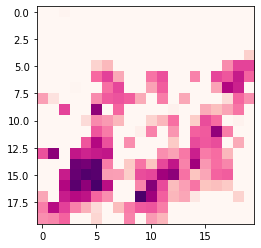

In [18]:
# taking a look at our map really quick
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

In [19]:
hist2d.shape, long_edges.shape, lat_edges.shape

((20, 20), (21,), (21,))

In [71]:
long_edges

array([-150., -135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,
        -15.,    0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,
        120.,  135.,  150.])

In [72]:
long_edges[:-1]

array([-150., -135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,
        -15.,    0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,
        120.,  135.])

In [73]:
long_edges[1:]

array([-135., -120., -105.,  -90.,  -75.,  -60.,  -45.,  -30.,  -15.,
          0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,  120.,
        135.,  150.])

In [74]:
(long_edges[:-1] + long_edges[1:])/2

array([-142.5, -127.5, -112.5,  -97.5,  -82.5,  -67.5,  -52.5,  -37.5,
        -22.5,   -7.5,    7.5,   22.5,   37.5,   52.5,   67.5,   82.5,
         97.5,  112.5,  127.5,  142.5])

In [20]:
# let's make bin centers from our edges
long_centers = (long_edges[:-1] + long_edges[1:])/2
long_centers

array([-167.78055671, -150.02555893, -132.27056115, -114.51556337,
        -96.76056559,  -79.00556781,  -61.25057003,  -43.49557225,
        -25.74057447,   -7.98557669,    9.76942109,   27.52441887,
         45.27941665,   63.03441443,   80.78941221,   98.54440999,
        116.29940777,  134.05440555,  151.80940333,  169.56440111])

In [21]:
lat_centers = (lat_edges[:-1] + lat_edges[1:])/2
lat_centers

array([-78.9736832, -71.1955456, -63.417408 , -55.6392704, -47.8611328,
       -40.0829952, -32.3048576, -24.52672  , -16.7485824,  -8.9704448,
        -1.1923072,   6.5858304,  14.363968 ,  22.1421056,  29.9202432,
        37.6983808,  45.4765184,  53.254656 ,  61.0327936,  68.8109312])

In [22]:
# specifing our own bins
long_bins = np.linspace(-150, 150, nlong+1)
lat_bins = np.linspace(-40, 70, nlat+1)

hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                              ufos['latitude'], 
                                              weights = ufos['duration_seconds'], 
                                              bins=[long_bins, lat_bins])

In [23]:
long_centers = (long_edges[:-1] + long_edges[1:])/2
lat_centers = (lat_edges[:-1] + lat_edges[1:])/2

In [24]:
# for bqplot we could figure this out ourselves, but let's save us some time right now:
hist2d = hist2d.T

In [25]:
# we'll also do some tricks for the colormap
np.log10(hist2d).min()

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


-inf

In [26]:
# so here we will set the "bad" values -> those with no sitings
hist2d[hist2d<= 0] = np.nan

hist2d = np.log10(hist2d)

In [28]:
#hist2d

Finally: let's make our heatmap:

In [30]:
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='RdPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))

# axis
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, label='Latitude', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=lat_centers, 
                             column=long_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

# interactivty
# not do for now

# put all together
fig = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=8.09710747658943, min=0.0, scheme='RdPu'),…

In [36]:
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='RdPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))

# axis
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, label='Latitude', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=lat_centers, 
                             column=long_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

# interactivity - do this!
mySelectedLabel = ipywidgets.Label() # print out info about our selection
def get_data_value(change):
    # to make sure we only support single selections
    if len(change['owner'].selected) == 1: # *only* 1 selection
        #print(change['owner'].selected)
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        mySelectedLabel.value = 'Total Duration in log(sec) = ' + str(v)
    
# make sure we "observe" for a change in our heatmap (traitlets)
heat_map.observe(get_data_value, 'selected')

# put all together
fig = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
#fig
# layout our dashboard
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

In [77]:
fig.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'animation_duration',
 'axes',
 'background_style',
 'fig_margin',
 'interaction',
 'layout',
 'legend_location',
 'legend_style',
 'legend_text',
 'marks',
 'max_aspect_ratio',
 'min_aspect_ratio',
 'padding_x',
 'padding_y',
 'pixel_ratio',
 'scale_x',
 'scale_y',
 'theme',
 'title',
 'title_style']

In [37]:
# for a random bin, let's plot what this distribution of siting duration as a function of 
#. would look like

In [38]:
ufos['date'] # need to use a date scale

0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: date, Length: 80332, dtype: datetime64[ns]

In [42]:
# first scales
import datetime as dt # for formatting min/max in our bqplot.DateScale
x_scl = bqplot.DateScale(min=dt.datetime(1950, 1, 1), max=dt.datetime(2020, 1,1))

In [40]:
y_scl = bqplot.LogScale() # since we know duration is best shown in log

In [41]:
# axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl) # dates
ax_ycl = bqplot.Axis(label='Duration in log(sec)', scale=y_scl, 
                    orientation='vertical', side='left')

In [45]:
i, j = 19, 0 # x/y bin index (Jill is cheating by knowing there is data there)
# is specify that we have only data in this lat/long bin
#. => will mask out only these lats/longs corresponding to this i/j bin
# (1) let's grab these sets of lats/longs based on our histogram edges
longs = [long_edges[j], long_edges[j+1]]
lats = [lat_edges[i], lat_edges[i+1]]
#longs, lats
# I only want data in this particular longtitude & latitude bin
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude'] <= lats[1]) &\
               (ufos['longitude'] >= longs[0]) & (ufos['longitude']<= longs[1]) )

In [48]:
ufos['longitude'][region_mask]

327     -147.716389
2845    -147.716389
3620    -147.716389
4602    -147.349444
6011    -147.716389
            ...    
77347   -147.349444
77497   -147.716389
78571   -147.716389
79029   -147.716389
79470   -147.716389
Name: longitude, Length: 74, dtype: float64

In [50]:
# let's make our marks -> scatter plot
duration_scatt = bqplot.Scatter(x=ufos['date'][region_mask], 
                               y=ufos['duration_seconds'][region_mask],
                               scales={'x':x_scl, 'y':y_scl})

In [51]:
# put it all together as a figure
fig_dur = bqplot.Figure(marks=[duration_scatt], axes=[ax_xcl, ax_ycl])
fig_dur

Figure(axes=[Axis(label='Date', scale=DateScale(max=datetime.datetime(2020, 1, 1, 0, 0), min=datetime.datetime…

In [59]:
# CREATE LABEL - #1
mySelectedLabel = ipywidgets.Label() # print out info about our selection

In [60]:
# CREATE HEATMAP ELEMENTS - #2
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='RdPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))

# axis
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, label='Latitude', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=lat_centers, 
                             column=long_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

In [61]:
# CREATE SCATTER PLOT ELEMENTS - #3

# scales
x_scl = bqplot.DateScale(min=dt.datetime(1950, 1, 1), max=dt.datetime(2020, 1,1))
y_scl = bqplot.LogScale() # since we know duration is best shown in log

# axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl) # dates
ax_ycl = bqplot.Axis(label='Duration in log(sec)', scale=y_scl, 
                    orientation='vertical', side='left')

# marks
i, j = 19, 0 
longs = [long_edges[j], long_edges[j+1]]
lats = [lat_edges[i], lat_edges[i+1]]
# I only want data in this particular longtitude & latitude bin
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude'] <= lats[1]) &\
               (ufos['longitude'] >= longs[0]) & (ufos['longitude']<= longs[1]) )

duration_scatt = bqplot.Scatter(x=ufos['date'][region_mask], 
                               y=ufos['duration_seconds'][region_mask],
                               scales={'x':x_scl, 'y':y_scl})

In [66]:
duration_scatt.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'color',
 'colors',
 'default_opacities',
 'default_size',
 'default_skew',
 'display_legend',
 'display_names',
 'drag_color',
 'drag_size',
 'enable_delete',
 'enable_hover',
 'enable_move',
 'fill',
 'hovered_point',
 'hovered_style',
 'interactions',
 'labels',
 'marker',
 'names',
 'names_unique',
 'opacity',
 'preserve_domain',
 'restrict_x',
 'restrict_y',
 'rotation',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'size',
 'skew',
 'stroke',
 'stroke_width',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unhovered_style',
 'unselected_style',
 'update_on_move',
 'visible',
 'x',
 'y']

In [67]:
heat_map.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'anchor_style',
 'apply_clip',
 'color',
 'column',
 'column_align',
 'display_format',
 'display_legend',
 'enable_hover',
 'font_style',
 'interactions',
 'labels',
 'null_color',
 'opacity',
 'preserve_domain',
 'row',
 'row_align',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [62]:
# LINKING SCATTER PLOT WITH HEATMAP
def get_data_value(change):
    # to make sure we only support single selections
    if len(change['owner'].selected) == 1: # *only* 1 selection
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        mySelectedLabel.value = 'Total Duration in log(sec) = ' + str(v)
        # UPDATE SCATTER PLOT TOO
        longs = [long_edges[j], long_edges[j+1]]
        lats = [lat_edges[i], lat_edges[i+1]]
        # I only want data in this particular longtitude & latitude bin
        region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude'] <= lats[1]) &\
                       (ufos['longitude'] >= longs[0]) & (ufos['longitude']<= longs[1]) )
        # we already developed our scatter plot with binning in mind
        duration_scatt.x = ufos['date'][region_mask]
        duration_scatt.y = ufos['duration_seconds'][region_mask]
          
# make sure we "observe" for a change in our heatmap (traitlets)
heat_map.observe(get_data_value, 'selected')

In [63]:
# CREATE FIGURE OBJECTS - #5
fig_heatmap = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks=[duration_scatt], axes=[ax_xcl, ax_ycl])

In [65]:
# Put it all together finally!  As a dashboard
fig_heatmap.layout.min_width='400px'
fig_dur.layout.min_width = '400px'

plots = ipywidgets.HBox([fig_heatmap, fig_dur])
myDashboard = ipywidgets.VBox([mySelectedLabel, plots])
myDashboard

# Beginning Chloropeth Maps (more next week)

In [68]:
# a quick map of the US

# scales
sc_geo = bqplot.AlbersUSA() # a projection from the globe (sphere) onto a plane (US centric)
# "axis"
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# marks
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[states_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [70]:
# scales
sc_geo = bqplot.Gnomonic() # a projection from the globe (sphere) onto a plane 
# "axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

# Choose your own adventure
1. Work on the dashboard for the HW <- totally fine place to be
1. Check out the prep notebook for part 2 -> building a dashboard with an interactive map
  * tooltip (how to build one & limitation there of)
  * use this as a base to do multiple line plots to compare exports from states

In [ ]:
x_ax = bqplot.Axis(scale = x_sc, label='Agency Name', label_offset='100px',
                  tick_rotate=45, # rotated
                   tick_style={'font-size':'3px', 'tick_offset':'100px','text-anchor': 'top'})
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Congressional District')
